# 2장 회귀분석

## 2장-1절. 단순선형회귀분석

In [1]:
## 경고문구 없애기
import warnings
warnings.filterwarnings('ignore')
# 기본 패키지 import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# 회귀분석 관련 패키지
import statsmodels.api as sm
import scipy.stats

---
---

## 데이터 불러오기

In [9]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\rbtkd\\ADP_codingbook\\회귀'

In [11]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")

In [12]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [17]:
# target 변수 제거
boston_data = boston.drop(['Target'], axis=1)
boston_data.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0


In [19]:
# 변수설정
target = boston[['Target']]
crim = boston[['CRIM']]

In [20]:
# 상수항 추가
crim1 = sm.add_constant(crim, has_constant='add')

---

## 01. 회귀분석

In [22]:
# 모델 적합시키기
model_crim = sm.OLS(target, crim1)
fitted_model_crim = model_crim.fit()

In [23]:
# 결과 출력
fitted_model_crim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           1.17e-19
Time:                        14:04:39   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# lstat변수로 피팅
lstat = boston[['LSTAT']]
lstat1 = sm.add_constant(lstat, has_constant='add')
model_lstat = sm.OLS(target,lstat1)
fitted_model_lstat = model_lstat.fit()
fitted_model_lstat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           5.08e-88
Time:                        15:06:31   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

![image](https://user-images.githubusercontent.com/80219821/131785226-cfe6f4e9-1bc1-40a0-9d9a-8b716facca99.png)

![image](https://user-images.githubusercontent.com/80219821/131785320-1513d037-190c-487f-8584-0ecc60fe2452.png)


![image](https://user-images.githubusercontent.com/80219821/131785360-a9074424-8b7e-4bd3-a700-9b9da89fed38.png)


### @ 이 중 가장 유의깊게 봐야할 항목
- R-squared
- p-value
- coef
- AIC

In [31]:
# 모델 예측하기 (y_hat)
pred_crim = fitted_model_crim.predict(crim1)
pred_lstat = fitted_model_lstat.predict(lstat1)

In [32]:
# 가시적으로 y_hat 확인
np.dot(crim1, fitted_model_crim.params) - pred_crim

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

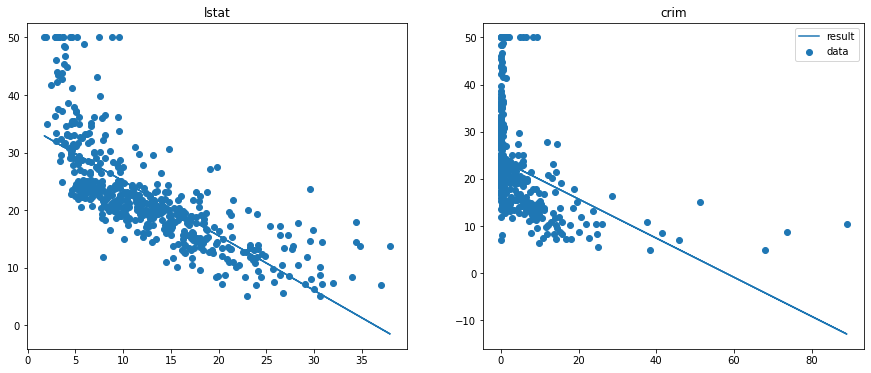

In [35]:
# 모델 시각화 (종속변수와실제데이터 = data, 종속변수와예측데이터 = result)
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].scatter(lstat,target,label='data')
ax[0].plot(lstat,pred_lstat,label='result')
ax[0].set_title('lstat')

ax[1].scatter(crim,target,label='data')
ax[1].plot(crim,pred_crim,label='result')
ax[1].set_title('crim')
plt.legend()
plt.show()

=> LSTAT은 비교적 선형 관계를 이루지만, CRIM은 왼쪽 위 부분이 잘 맞지 않는다.

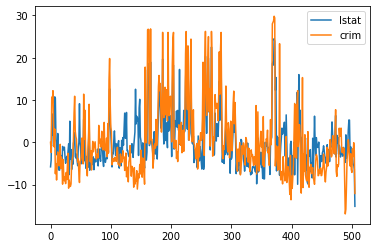

In [36]:
# residual 시각화 (잔차)
fitted_model_lstat.resid.plot(label="lstat")
fitted_model_crim.resid.plot(label="crim")
plt.legend()
plt.show()

=> LSTAT 변수가 가장 0주변에 잔차가 모여있음으로 가장 좋은 모델이다.

---
---

## 02. 잔차분석

In [38]:
# 잔차
residual = pred_lstat - boston.Target
residual_crim = pred_crim - boston.Target

#### 01. 모델의 선형성
- 예측과과 잔차를 비교
- 모득 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다.
- 빨간 실선은 잔차의 추세를 나타낸다.
- 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것으로 선형성이 없다는 것이다.

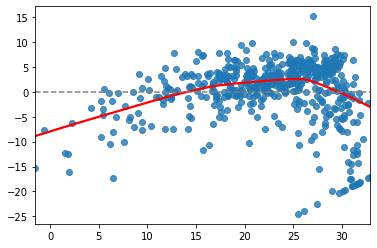

In [39]:
fitted = pred_lstat

sns.regplot(fitted, residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()], [0,0], '--', color='gray')

---

#### 02. 잔차의 정규성
- 잔차가 정규분포를 따른다는 가정을 한다.
- QQ plot으로 확인할 수 있다.
- 잔차가 정규분포를 띄면 QQplot에서 점들이 점선을 따라 배치되어야 한다.

[]

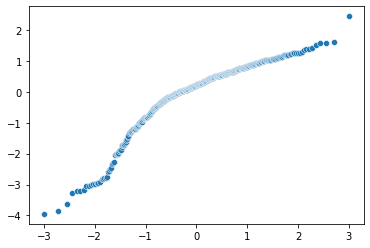

In [42]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x,y),_ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='gray')

---

#### 04. 잔차의 독립성
- Result.summary의 Durbin-Watson(더빈왓슨,DW검정)으로 확인한다.
- DW검정은 잔차의 독립성을 확인할 수 있는 수치이다. 0이면 잔차들이 양의 자기상관을 갖고, 2이면 자기상관이 없는 독립성을 갖고, 4이면 잔차들이 음의 자기상관을 갖는다고 해석한다.
- 보통 1.5~2.5 사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미한다.
-  DW검정값이 0또는4에 가깝다는 것은 잔차들이 자기상관을 가지고 있다는 의미이고, 이는 t값,F값,R제곱을 실제보다 증가시켜 실제로 유의미하지 않은 결과를 유의미한 결과로 왜곡하게 된다.

---

#### 05. 극단값
- Cook's distance는 극단값을 나타내는 지표이다.

374    0.086162
412    0.070029
214    0.051465
141    0.043151
373    0.042694
dtype: float64


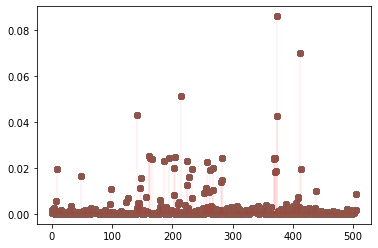

In [46]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _= OLSInfluence(fitted_model_lstat).cooks_distance
print(cd.sort_values(ascending=False).head())

for i,j in zip(boston.index.values,cd):
    plt.scatter(boston.index.values,cd)
    plt.vlines(i,0,j,linewidth=0.1,colors='r')